In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

df = pd.read_csv("apartments_for_rent_classified_10k.csv", sep=";", encoding='cp1252')

In [126]:
df.shape

(10000, 22)

In [128]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [130]:
display(df)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [195]:
# remove rows where rent is not payed monthly, where there are no bedrooms, and where the listing is not categorized as "housing/rent/apartment"
filtered_df = df[df['price_type'] == 'Monthly']
filtered_df = filtered_df[filtered_df['bedrooms'] != 0]
filtered_df = filtered_df[filtered_df['category'] == 'housing/rent/apartment']

In [199]:
display(filtered_df)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
12,5664598162,housing/rent/apartment,Studio apartment 2326 N 6th Avenue,"This unit is located at 2326 N sixth Avenue, T...",NaN,NaN,1.0,USD,No,Thumbnail,...,"$1,795",Monthly,156,2326 N 6th Ave,Tucson,AZ,32.2264,-110.9438,RentLingo,1577017148
16,5654898031,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 bedrooms, 1 micro...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,"$1,560",Monthly,200,180 Moonlight Lake Drive,New Bern,NC,35.0960,-77.0272,RentDigs.com,1576406273
17,5664574876,housing/rent/apartment,One BR Spring Ridge Dr,"This unit is located at Spring Ridge Dr, Sprin...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$1,000",Monthly,200,NaN,Spring,TX,30.0871,-95.4685,RentLingo,1577015327
18,5668633573,housing/rent/apartment,Studio apartment 545 Georgia street 717-723 Su...,This unit is located at 545 Georgia street 717...,NaN,1.0,1.0,USD,No,Thumbnail,...,$950,Monthly,200,545 Georgia St 717-723 Sutter St,Vallejo,CA,38.1172,-122.2313,RentLingo,1577359918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [177]:
# remove columns except for number of bathrooms, number of bedrooms, price, square feet, latitude, and longitude

apartment_df = filtered_df[['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']]

In [179]:
display(apartment_df)

,bathrooms,bedrooms,price,square_feet,latitude,longitude
1,NaN,1.0,425,106,37.9680,-87.6621
12,NaN,1.0,1795,156,32.2264,-110.9438
16,1.0,1.0,1560,200,35.0960,-77.0272
17,1.0,1.0,1000,200,30.0871,-95.4685
18,1.0,1.0,950,200,38.1172,-122.2313
...,...,...,...,...,...,...
9995,4.0,5.0,6000,6300,44.9000,-93.3233
9996,8.0,6.0,25000,8716,34.4331,-119.6331
9997,8.5,6.0,11000,11318,39.0287,-77.2409
9998,NaN,1.0,4790,40000,40.7716,-73.9876


In [183]:
# remove rows where there is NaN

apartment_df = apartment_df.dropna()

display(apartment_df)

,bathrooms,bedrooms,price,square_feet,latitude,longitude
16,1.0,1.0,1560,200,35.0960,-77.0272
17,1.0,1.0,1000,200,30.0871,-95.4685
18,1.0,1.0,950,200,38.1172,-122.2313
19,1.0,1.0,625,200,33.9649,-84.5107
20,1.0,1.0,600,200,35.2016,-80.8124
...,...,...,...,...,...,...
9994,4.0,6.0,3000,5921,37.0835,-113.5823
9995,4.0,5.0,6000,6300,44.9000,-93.3233
9996,8.0,6.0,25000,8716,34.4331,-119.6331
9997,8.5,6.0,11000,11318,39.0287,-77.2409


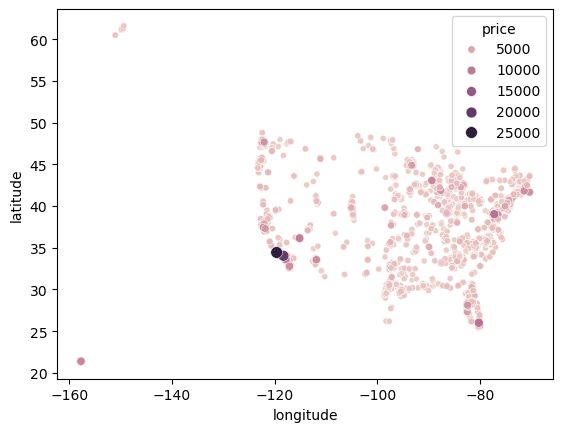

In [217]:

sns.scatterplot(data=apartment_df, x='longitude', y='latitude', hue='price', size='price')

plt.legend(title="price")
plt.show()

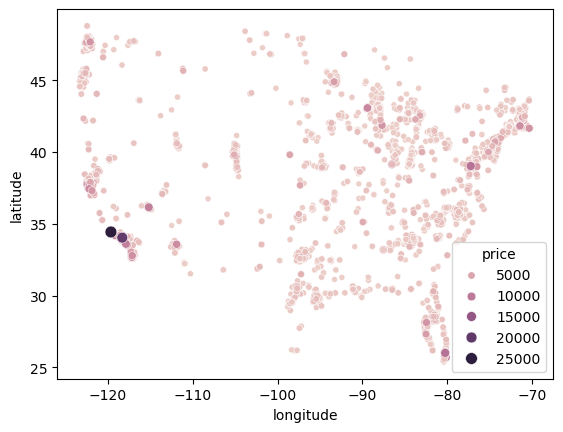

In [231]:
# remove non-mainland US entries

apartment_df = apartment_df[apartment_df['longitude'] >= -140]

sns.scatterplot(data=apartment_df, x='longitude', y='latitude', hue='price', size='price')

plt.legend(title="price")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

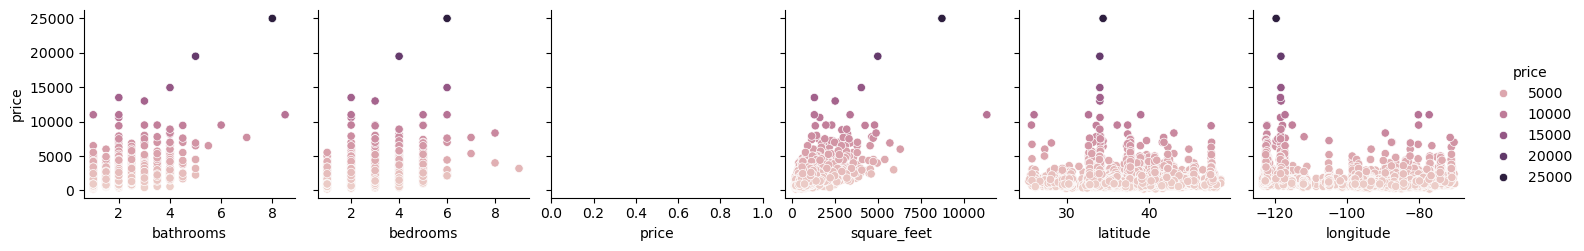

In [263]:
rng = np.random.RandomState()
indices = rng.choice(np.arange(len(apartment_df)), size=9000, replace=False)

sns.pairplot(apartment_df.iloc[indices], x_vars=apartment_df.columns, y_vars='price', hue='price')
plt.show